## Business Overview:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


## Project Goal

The goal is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

- Find out 
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [222]:
#Let us import all the relevant libraries
import pandas as pd
import numpy as np


In [223]:
#Read the data set provided
bike_df = pd.read_csv('day.csv')

In [224]:
#let us see the how the dataframe looks
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [225]:
#let us look at the dimensions of the data set
bike_df.shape

(730, 16)

In [226]:
#let us look at the columns 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [227]:
#doesn't look like there are null values, but let us confirm
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 2: Data Clean up

Looking at the csv and data dictionary we can come to the conclusion that we can drop some variables 
- Instant: This is a record index, would not add much value
- dteday: This information is already getting captured in 'mnth' and 'yr' column.
- casual & registered - We our target variable is 'cnt' which we have to predict and 'cnt' is the sum of casual and registered these variables don't add value to the model


In [228]:
# Droping instant, dteday, casual and registered columns
bike_df.drop(['instant'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)
bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['dteday'], axis = 1, inplace = True)

In [229]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

#### We see that values for some variables, season, month, weekday, weathersit, are numerical however they are categorical.

Let us convert the variables accordinly

In [231]:
#let us start with season, let us see the current distribution
bike_df['season'].value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [232]:
#let us update the values and validate
bike_df.season = bike_df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})


In [233]:
bike_df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [234]:
#let us repeat the same for month, let us check the current values
bike_df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [235]:
#let us update and validate
bike_df.mnth = bike_df.mnth.map({1: 'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_df.mnth.value_counts()


Aug      62
Oct      62
Jan      62
May      62
Dec      62
July     62
March    62
June     60
Sept     60
April    60
Nov      60
Feb      56
Name: mnth, dtype: int64

In [236]:
#let us update weekday variable
bike_df.weekday = bike_df.weekday.map({0: 'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})
bike_df.weekday.value_counts()

Sat     105
Mon     105
Sun     105
Tue     104
Thur    104
Fri     104
Wed     103
Name: weekday, dtype: int64

In [237]:
#let us update weathersit variable to make it more readable
bike_df.weathersit= bike_df.weathersit.map({1: 'Clear',2:'Mist & Cloudy',3:'Light Snow',4:'Heavy Rain'})
bike_df.weathersit.value_counts()


Clear            463
Mist & Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [238]:
#let us look how the data looks now 
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [239]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

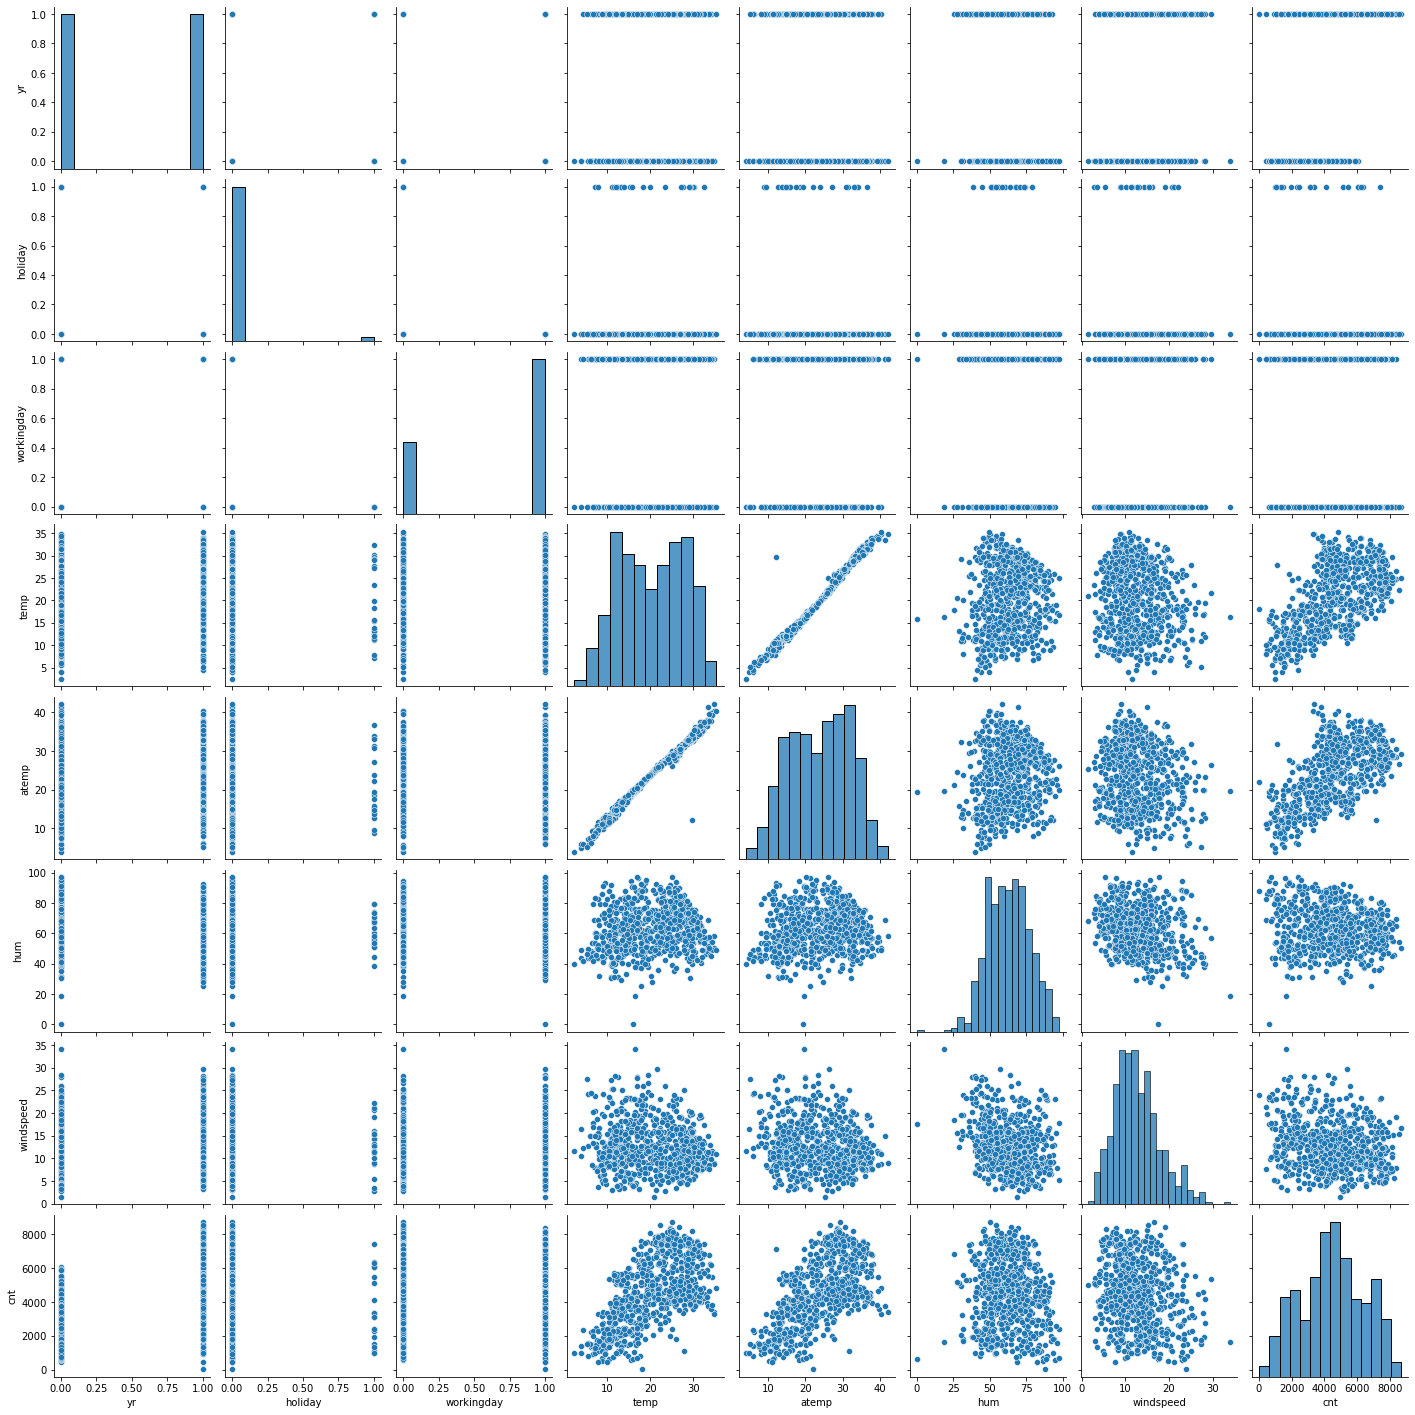

In [240]:
sns.pairplot(bike_df)
plt.show()

## Inferences

From the graph we can see that :
- temp and atemp have a linear correction with cnt which is our target variabl
- temp and atemp are highly correlated to each other.
- We do see a pattern where cnt is generally spread in higher humidity


#### Visualising Categorical Variables

Now,there are a few categorical variables as well. Let's make a boxplot for some of these variables.

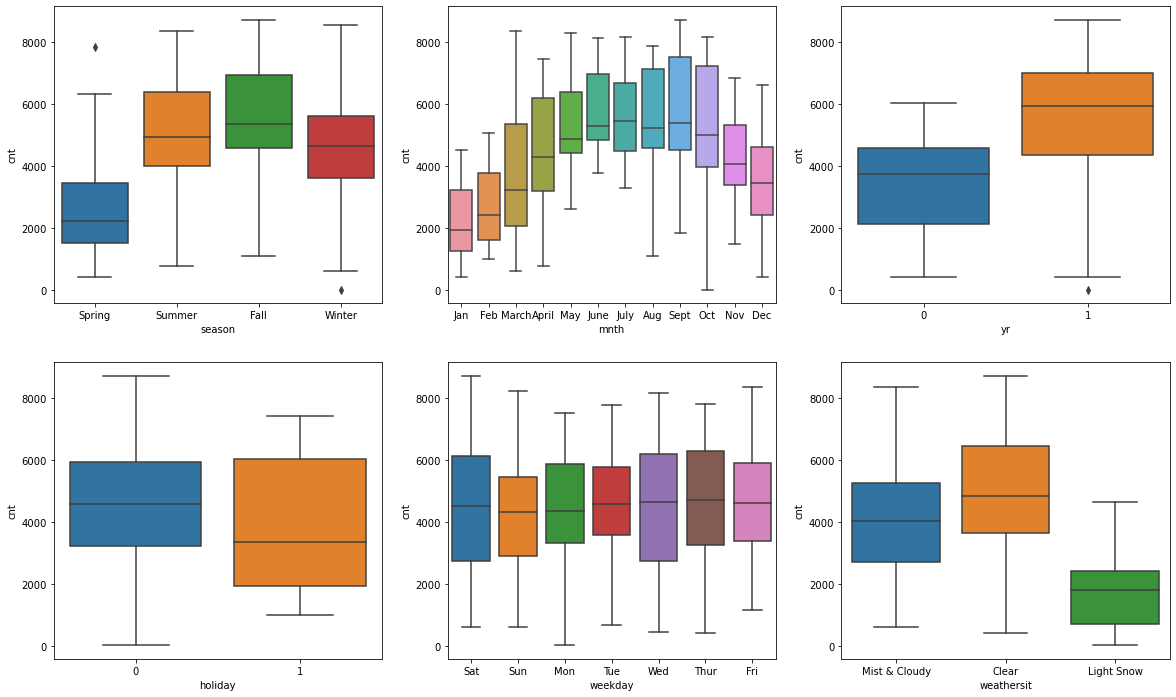

In [241]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data = bike_df)
plt.subplot(2,3,3)
#even though yr is int type however it is binary data, let us explore this as well.
sns.boxplot(x='yr',y='cnt',data = bike_df)
plt.subplot(2,3,4)
#even though holiday is int type however it is binary data, let us explore this as well.
sns.boxplot(x='holiday',y='cnt',data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data = bike_df)
plt.show()

## Inference

From the above graphs we can see that:
-   The median count of bike rentals is the lowest in spring and highest in the fall
-   The median count of bike rentals in higher during June - Sept while it is the lower during Decemeber and Janurary
-   Bike rentals have increase in 2019 as compared to 2018, this indicates an upward trend.
-   Bike rentals have higher during weekdays and low during the holidays.
-   Bike rental demand is relatively same on all days of the week.
-   Bike rental is high when the weather is clear, it starts to reduce when it is misty. When it is Snowing bike rentals are the lowest while no one takes bike rentals where there heavy snow.   

## Step 4 Preparing data for modelling

- Encoding
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
- Splitting the data into train and test
- Rescaling of variables

In [242]:
#let us look at bike_df
bike_df.head()

#we see that we do not need to covert yr, holiday and working day into binary as they are alreay in binary

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [243]:
#now let us create dummy variables for season, mnth, weekday and weathersit.
dummy = bike_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)
dummy

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [244]:
#adding the newly created columms to origin dataframe
bike_df = pd.concat([bike_df,dummy],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
0,Spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [245]:
#now let us drop the columns for which we had created the dummy variables
bike_df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [246]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [247]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_Spring             730 non-null    uint8  
 9   season_Summer             730 non-null    uint8  
 10  season_Winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

#### Splitting the data into train and test

In [248]:
#let us import the appropriate libraby
import sklearn
from sklearn.model_selection import train_test_split

In [249]:
#let us split the data into train and test
bike_train, bike_test = train_test_split(bike_df, train_size=.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


#### Rescaling the train variables using MinMaxScaler

In [250]:
#importing the appropriable libraries
from sklearn.preprocessing import MinMaxScaler

In [251]:
#Now let us scale the variables
#1. Instantiate an object
scaler = MinMaxScaler()

#2 #create a list of numeric variables
num_vars = ['cnt','temp','atemp','hum','windspeed']

#3. Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

<ipython-input-251-c985cc341fa0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
/Users/sbhardwa/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [252]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [253]:
#let us see how the scaled up variables lool
bike_train.describe()
#you can see that the min is 0 and max is 1 for temp, atemp, hum, windspeed and cnt. This shows that the scaling has taken effect.

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Building the model

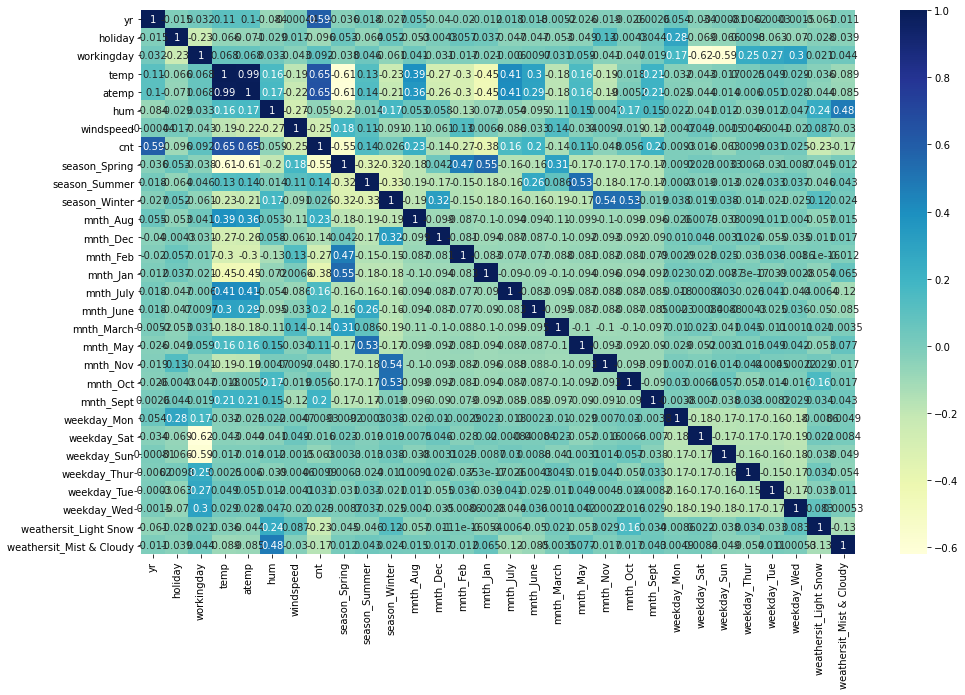

In [254]:
#let us create a heatmap
plt.figure(figsize = (16,10))
sns.heatmap(bike_train.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

*cnt seems to be highly co-related to temp & atemp. atemp and temp are almost same. We can drop one of the columns for our modelling*

In [255]:
#Let us divede the training data into X and Y variables
y_train = bike_train.pop('cnt')
X_train = bike_train

In [256]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Let us build a model by adding all the variables first

In [257]:
#let us add all the relevant libraries required for modelling
import statsmodels.api as sm

In [258]:
#let us see the columns
#Step 1 - Add a constant

X_train_sm = sm.add_constant(X_train)

In [259]:
#Create a model
lr = sm.OLS(y_train,X_train_sm)

#fitting the model.
lr_model = lr.fit()

#Viewing summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.81e-180
Time:                        22:44:54   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2433      0.035      6.887      0.000       0.174       0.313
yr                           0.2325      0.008     28.794      0.000       0.217       0.248
holiday                      0.0109      0.024      0.451      0.652      -0.037       0.058
workingday                   0.0963      0.012      7.835      0.000       0.072       0.120
temp                         0.3880      0.142      2.727      0.007       0.108       0.668
atemp                        0.0590      0.138      0.426      0.670      -0.213       0.331
hum                         -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                   -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_Spring               -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_Summer                0.0424      0.026      1.617      0.107      -0.009       0.094
season_Winter                0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                     0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                    -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                    -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                    -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_July                   -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_June                    0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_March                   0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                     0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                    -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept                    0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon                 -0.0216      0.015     -1.401      0.162      -0.052       0.009
weekday_Sat                  0.0952      0.014      6.910      0.000       0.068       0.122
weekday_Sun                  0.0410      0.014      2.929      0.004       0.013       0.068
weekday_Thur                -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_Tue                 -0.0184      0.016     -1.184      0.237      -0.049       0.012
weekday_Wed                 -0.0059      0.015     -0.394      0.694      -0.035       0.023
weathersit_Light Snow       -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist & Cloudy    -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [260]:
#let us import the relavant libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [261]:
#Let us calculate Variance inflation factor (VIF)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,weekday_Sat,19.71
23,weekday_Sun,18.34
7,season_Spring,10.77
9,season_Winter,9.46
8,season_Summer,8.29
18,mnth_Nov,6.79
10,mnth_Aug,6.47



#### Logic for elimination 
- High P value, High VIF - drop the variable
- High & low  combination 
    -   High P Low VIF - remove the variable in the first iteration 
    -   Low p High VIF - remove this varibale after executing the above elimination.
-   Low p & Low VIF - Keep the variable

For 'p' we are looking at values < .05. <br>
For VIF we are looking at values < 5

In [262]:
# we see a high P value for atemp and we also know it is coorelated with temp, so let us drop this variable first
X = X_train.drop('atemp',axis=1)

In [263]:
#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.00e-181
Time:                        22:44:54   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2431      0.035      6.888      0.000       0.174       0.312
yr                           0.2324      0.008     28.819      0.000       0.217       0.248
holiday                      0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                   0.0962      0.012      7.835      0.000       0.072       0.120
temp                         0.4454      0.046      9.628      0.000       0.354       0.536
hum                         -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                   -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_Spring               -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_Summer                0.0430      0.026      1.645      0.101      -0.008       0.094
season_Winter                0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                     0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                    -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                    -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                    -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                   -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                    0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_March                   0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                     0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                    -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                     0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept                    0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                 -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_Sat                  0.0956      0.014      6.958      0.000       0.069       0.123
weekday_Sun                  0.0413      0.014      2.964      0.003       0.014       0.069
weekday_Thur                -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_Tue                 -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_Wed                 -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist & Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                    

In [264]:
#Let us check the VIF value for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,workingday,85.54
21,weekday_Sat,19.71
22,weekday_Sun,18.34
6,season_Spring,10.75
8,season_Winter,9.44
7,season_Summer,8.27
3,temp,7.08
17,mnth_Nov,6.79
18,mnth_Oct,6.47
9,mnth_Aug,6.36


In [265]:
#next we drop holiday
X = X.drop('holiday',axis=1)

In [266]:
#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.00e-181
Time:                        22:44:54   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2531      0.052      4.859      0.000       0.151       0.356
yr                           0.2324      0.008     28.819      0.000       0.217       0.248
workingday                   0.0861      0.027      3.234      0.001       0.034       0.138
temp                         0.4454      0.046      9.628      0.000       0.354       0.536
hum                         -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                   -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_Spring               -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_Summer                0.0430      0.026      1.645      0.101      -0.008       0.094
season_Winter                0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                     0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                    -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                    -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                    -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                   -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                    0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_March                   0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                     0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                    -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                     0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept                    0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                 -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_Sat                  0.0855      0.030      2.835      0.005       0.026       0.145
weekday_Sun                  0.0313      0.030      1.035      0.301      -0.028       0.091
weekday_Thur                -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_Tue                 -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_Wed                 -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist & Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Ja

In [267]:
#Let us check the VIF value for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,hum,39.73
2,temp,38.40
1,workingday,22.34
5,season_Spring,12.33
7,season_Winter,12.06
6,season_Summer,7.92
20,weekday_Sat,6.58
17,mnth_Oct,6.38
8,mnth_Aug,6.23
21,weekday_Sun,6.16


In [268]:
#Let us drop mnth_March
X = X.drop('mnth_March',axis=1)


In [269]:
#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.87e-182
Time:                        22:44:54   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2539      0.050      5.098      0.000       0.156       0.352
yr                           0.2324      0.008     28.848      0.000       0.217       0.248
workingday                   0.0862      0.027      3.239      0.001       0.034       0.138
temp                         0.4450      0.046      9.763      0.000       0.355       0.535
hum                         -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed                   -0.1861      0.026     -7.245      0.000      -0.237      -0.136
season_Spring               -0.0443      0.028     -1.563      0.119      -0.100       0.011
season_Summer                0.0427      0.026      1.668      0.096      -0.008       0.093
season_Winter                0.1079      0.027      3.934      0.000       0.054       0.162
mnth_Aug                     0.0198      0.032      0.627      0.531      -0.042       0.082
mnth_Dec                    -0.0454      0.026     -1.748      0.081      -0.096       0.006
mnth_Feb                    -0.0337      0.022     -1.512      0.131      -0.078       0.010
mnth_Jan                    -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_July                   -0.0344      0.033     -1.035      0.301      -0.100       0.031
mnth_June                    0.0042      0.023      0.179      0.858      -0.042       0.050
mnth_May                     0.0243      0.020      1.235      0.218      -0.014       0.063
mnth_Nov                    -0.0409      0.031     -1.329      0.185      -0.101       0.020
mnth_Oct                     0.0066      0.031      0.215      0.830      -0.054       0.067
mnth_Sept                    0.0852      0.029      2.945      0.003       0.028       0.142
weekday_Mon                 -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat                  0.0855      0.030      2.840      0.005       0.026       0.145
weekday_Sun                  0.0313      0.030      1.036      0.301      -0.028       0.091
weekday_Thur                -0.0091      0.016     -0.587      0.558      -0.040       0.021
weekday_Tue                 -0.0179      0.015     -1.157      0.248      -0.048       0.013
weekday_Wed                 -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_Light Snow       -0.2558      0.026     -9.709      0.000      -0.308      -0.204
weathersit_Mist & Cloudy    -0.0596      0.010     -5.716      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):       

In [270]:
#Let us check the VIF value for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,hum,38.53
2,temp,38.32
1,workingday,21.33
7,season_Winter,11.26
5,season_Spring,9.53
6,season_Summer,7.90
19,weekday_Sat,6.28
20,weekday_Sun,5.93
8,mnth_Aug,5.79
4,windspeed,5.25


In [271]:
#next we drop mnth_June
X = X.drop('mnth_June',axis=1)

In [272]:
#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.72e-183
Time:                        22:44:54   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2543      0.050      5.116      0.000       0.157       0.352
yr                           0.2323      0.008     28.999      0.000       0.217       0.248
workingday                   0.0864      0.027      3.255      0.001       0.034       0.139
temp                         0.4493      0.039     11.630      0.000       0.373       0.525
hum                         -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed                   -0.1865      0.026     -7.302      0.000      -0.237      -0.136
season_Spring               -0.0459      0.027     -1.704      0.089      -0.099       0.007
season_Summer                0.0416      0.025      1.678      0.094      -0.007       0.090
season_Winter                0.1070      0.027      3.972      0.000       0.054       0.160
mnth_Aug                     0.0163      0.025      0.656      0.512      -0.033       0.065
mnth_Dec                    -0.0457      0.026     -1.768      0.078      -0.097       0.005
mnth_Feb                    -0.0334      0.022     -1.504      0.133      -0.077       0.010
mnth_Jan                    -0.0640      0.022     -2.902      0.004      -0.107      -0.021
mnth_July                   -0.0381      0.026     -1.481      0.139      -0.089       0.012
mnth_May                     0.0226      0.017      1.305      0.192      -0.011       0.057
mnth_Nov                    -0.0417      0.030     -1.370      0.171      -0.101       0.018
mnth_Oct                     0.0052      0.030      0.176      0.860      -0.053       0.064
mnth_Sept                    0.0825      0.024      3.381      0.001       0.035       0.130
weekday_Mon                 -0.0209      0.015     -1.364      0.173      -0.051       0.009
weekday_Sat                  0.0859      0.030      2.860      0.004       0.027       0.145
weekday_Sun                  0.0316      0.030      1.050      0.294      -0.028       0.091
weekday_Thur                -0.0091      0.015     -0.589      0.556      -0.040       0.021
weekday_Tue                 -0.0180      0.015     -1.160      0.247      -0.048       0.012
weekday_Wed                 -0.0054      0.015     -0.365      0.715      -0.035       0.024
weathersit_Light Snow       -0.2557      0.026     -9.717      0.000      -0.307      -0.204
weathersit_Mist & Cloudy    -0.0595      0.010     -5.720      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                     

In [273]:
#Let us check the VIF value for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
3,hum,38.14
2,temp,24.50
1,workingday,21.15
7,season_Winter,10.90
5,season_Spring,8.48
6,season_Summer,7.36
18,weekday_Sat,6.21
19,weekday_Sun,5.87
4,windspeed,5.21
14,mnth_Nov,4.68


In [274]:
# let us drop mnth_Oct
X = X.drop('mnth_Oct',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.53e-184
Time:                        22:44:55   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2560      0.049      5.252      0.000       0.160       0.352
yr                           0.2323      0.008     29.032      0.000       0.217       0.248
workingday                   0.0860      0.026      3.256      0.001       0.034       0.138
temp                         0.4487      0.038     11.669      0.000       0.373       0.524
hum                         -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed                   -0.1862      0.025     -7.313      0.000      -0.236      -0.136
season_Spring               -0.0466      0.027     -1.747      0.081      -0.099       0.006
season_Summer                0.0401      0.023      1.722      0.086      -0.006       0.086
season_Winter                0.1096      0.023      4.826      0.000       0.065       0.154
mnth_Aug                     0.0150      0.024      0.633      0.527      -0.031       0.061
mnth_Dec                    -0.0490      0.018     -2.689      0.007      -0.085      -0.013
mnth_Feb                    -0.0344      0.021     -1.602      0.110      -0.077       0.008
mnth_Jan                    -0.0650      0.021     -3.059      0.002      -0.107      -0.023
mnth_July                   -0.0395      0.025     -1.600      0.110      -0.088       0.009
mnth_May                     0.0226      0.017      1.307      0.192      -0.011       0.057
mnth_Nov                    -0.0459      0.019     -2.421      0.016      -0.083      -0.009
mnth_Sept                    0.0804      0.021      3.748      0.000       0.038       0.123
weekday_Mon                 -0.0209      0.015     -1.370      0.171      -0.051       0.009
weekday_Sat                  0.0854      0.030      2.858      0.004       0.027       0.144
weekday_Sun                  0.0312      0.030      1.041      0.298      -0.028       0.090
weekday_Thur                -0.0092      0.015     -0.591      0.555      -0.040       0.021
weekday_Tue                 -0.0180      0.015     -1.164      0.245      -0.048       0.012
weekday_Wed                 -0.0055      0.015     -0.367      0.714      -0.035       0.024
weathersit_Light Snow       -0.2556      0.026     -9.726      0.000      -0.307      -0.204
weathersit_Mist & Cloudy    -0.0595      0.010     -5.737      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                         30.4
==============================================================================

Note

In [275]:
#Let us check the VIF value for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,hum,36.66
2,temp,24.49
1,workingday,21.14
5,season_Spring,8.46
6,season_Summer,6.75
7,season_Winter,6.71
17,weekday_Sat,6.20
18,weekday_Sun,5.86
4,windspeed,5.13
8,mnth_Aug,3.27


In [276]:
# let us drop weekday_Wed

X = X.drop('weekday_Wed',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.42e-185
Time:                        22:44:55   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2539      0.048      5.250      0.000       0.159       0.349
yr                           0.2322      0.008     29.055      0.000       0.217       0.248
workingday                   0.0856      0.026      3.248      0.001       0.034       0.137
temp                         0.4483      0.038     11.674      0.000       0.373       0.524
hum                         -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed                   -0.1862      0.025     -7.319      0.000      -0.236      -0.136
season_Spring               -0.0467      0.027     -1.755      0.080      -0.099       0.006
season_Summer                0.0399      0.023      1.716      0.087      -0.006       0.086
season_Winter                0.1095      0.023      4.830      0.000       0.065       0.154
mnth_Aug                     0.0151      0.024      0.638      0.524      -0.031       0.061
mnth_Dec                    -0.0489      0.018     -2.689      0.007      -0.085      -0.013
mnth_Feb                    -0.0344      0.021     -1.603      0.110      -0.076       0.008
mnth_Jan                    -0.0651      0.021     -3.067      0.002      -0.107      -0.023
mnth_July                   -0.0392      0.025     -1.591      0.112      -0.088       0.009
mnth_May                     0.0227      0.017      1.311      0.191      -0.011       0.057
mnth_Nov                    -0.0462      0.019     -2.443      0.015      -0.083      -0.009
mnth_Sept                    0.0803      0.021      3.746      0.000       0.038       0.122
weekday_Mon                 -0.0179      0.013     -1.389      0.165      -0.043       0.007
weekday_Sat                  0.0881      0.029      3.043      0.002       0.031       0.145
weekday_Sun                  0.0339      0.029      1.168      0.244      -0.023       0.091
weekday_Thur                -0.0061      0.013     -0.467      0.640      -0.032       0.020
weekday_Tue                 -0.0150      0.013     -1.145      0.253      -0.041       0.011
weathersit_Light Snow       -0.2563      0.026     -9.782      0.000      -0.308      -0.205
weathersit_Mist & Cloudy    -0.0593      0.010     -5.730      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [277]:
# let us drop weekday_Thur
X = X.drop('weekday_Thur',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.36e-186
Time:                        22:44:55   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2512      0.048      5.235      0.000       0.157       0.345
yr                           0.2322      0.008     29.077      0.000       0.217       0.248
workingday                   0.0861      0.026      3.269      0.001       0.034       0.138
temp                         0.4484      0.038     11.686      0.000       0.373       0.524
hum                         -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed                   -0.1863      0.025     -7.327      0.000      -0.236      -0.136
season_Spring               -0.0466      0.027     -1.753      0.080      -0.099       0.006
season_Summer                0.0401      0.023      1.726      0.085      -0.006       0.086
season_Winter                0.1099      0.023      4.851      0.000       0.065       0.154
mnth_Aug                     0.0152      0.024      0.645      0.520      -0.031       0.062
mnth_Dec                    -0.0492      0.018     -2.709      0.007      -0.085      -0.014
mnth_Feb                    -0.0340      0.021     -1.590      0.112      -0.076       0.008
mnth_Jan                    -0.0650      0.021     -3.066      0.002      -0.107      -0.023
mnth_July                   -0.0389      0.025     -1.583      0.114      -0.087       0.009
mnth_May                     0.0228      0.017      1.317      0.188      -0.011       0.057
mnth_Nov                    -0.0466      0.019     -2.472      0.014      -0.084      -0.010
mnth_Sept                    0.0803      0.021      3.747      0.000       0.038       0.122
weekday_Mon                 -0.0160      0.012     -1.310      0.191      -0.040       0.008
weekday_Sat                  0.0905      0.028      3.175      0.002       0.034       0.146
weekday_Sun                  0.0363      0.029      1.268      0.205      -0.020       0.092
weekday_Tue                 -0.0131      0.012     -1.052      0.293      -0.037       0.011
weathersit_Light Snow       -0.2565      0.026     -9.797      0.000      -0.308      -0.205
weathersit_Mist & Cloudy    -0.0591      0.010     -5.719      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
#let us drop mnth_Aug	
X = X.drop('mnth_Aug',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.47e-187
Time:                        22:44:55   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2594      0.046      5.611      0.000       0.169       0.350
yr                           0.2324      0.008     29.128      0.000       0.217       0.248
workingday                   0.0863      0.026      3.282      0.001       0.035       0.138
temp                         0.4502      0.038     11.769      0.000       0.375       0.525
hum                         -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed                   -0.1864      0.025     -7.338      0.000      -0.236      -0.137
season_Spring               -0.0564      0.022     -2.576      0.010      -0.099      -0.013
season_Summer                0.0298      0.017      1.766      0.078      -0.003       0.063
season_Winter                0.1009      0.018      5.663      0.000       0.066       0.136
mnth_Dec                    -0.0500      0.018     -2.758      0.006      -0.086      -0.014
mnth_Feb                    -0.0340      0.021     -1.591      0.112      -0.076       0.008
mnth_Jan                    -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_July                   -0.0498      0.018     -2.770      0.006      -0.085      -0.014
mnth_May                     0.0224      0.017      1.299      0.195      -0.012       0.056
mnth_Nov                    -0.0476      0.019     -2.534      0.012      -0.085      -0.011
mnth_Sept                    0.0716      0.017      4.303      0.000       0.039       0.104
weekday_Mon                 -0.0160      0.012     -1.317      0.188      -0.040       0.008
weekday_Sat                  0.0911      0.028      3.201      0.001       0.035       0.147
weekday_Sun                  0.0364      0.029      1.275      0.203      -0.020       0.093
weekday_Tue                 -0.0129      0.012     -1.040      0.299      -0.037       0.011
weathersit_Light Snow       -0.2573      0.026     -9.847      0.000      -0.309      -0.206
weathersit_Mist & Cloudy    -0.0588      0.010     -5.703      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
#drop weekday_Tue

X = X.drop('weekday_Tue',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.51e-188
Time:                        22:44:55   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2580      0.046      5.582      0.000       0.167       0.349
yr                           0.2323      0.008     29.122      0.000       0.217       0.248
workingday                   0.0856      0.026      3.254      0.001       0.034       0.137
temp                         0.4505      0.038     11.777      0.000       0.375       0.526
hum                         -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed                   -0.1869      0.025     -7.358      0.000      -0.237      -0.137
season_Spring               -0.0562      0.022     -2.566      0.011      -0.099      -0.013
season_Summer                0.0296      0.017      1.751      0.081      -0.004       0.063
season_Winter                0.1004      0.018      5.639      0.000       0.065       0.135
mnth_Dec                    -0.0492      0.018     -2.718      0.007      -0.085      -0.014
mnth_Feb                    -0.0350      0.021     -1.636      0.102      -0.077       0.007
mnth_Jan                    -0.0649      0.021     -3.062      0.002      -0.107      -0.023
mnth_July                   -0.0507      0.018     -2.825      0.005      -0.086      -0.015
mnth_May                     0.0222      0.017      1.285      0.199      -0.012       0.056
mnth_Nov                    -0.0475      0.019     -2.525      0.012      -0.084      -0.011
mnth_Sept                    0.0718      0.017      4.314      0.000       0.039       0.104
weekday_Mon                 -0.0130      0.012     -1.102      0.271      -0.036       0.010
weekday_Sat                  0.0934      0.028      3.289      0.001       0.038       0.149
weekday_Sun                  0.0389      0.029      1.364      0.173      -0.017       0.095
weathersit_Light Snow       -0.2557      0.026     -9.802      0.000      -0.307      -0.204
weathersit_Mist & Cloudy    -0.0586      0.010     -5.683      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
#drop weekday_Sun
X = X.drop('weekday_Sun',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          7.16e-189
Time:                        22:44:55   Log-Likelihood:                 525.06
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2932      0.038      7.637      0.000       0.218       0.369
yr                           0.2327      0.008     29.165      0.000       0.217       0.248
workingday                   0.0529      0.011      4.899      0.000       0.032       0.074
temp                         0.4475      0.038     11.707      0.000       0.372       0.523
hum                         -0.1501      0.038     -3.991      0.000      -0.224      -0.076
windspeed                   -0.1871      0.025     -7.358      0.000      -0.237      -0.137
season_Spring               -0.0574      0.022     -2.620      0.009      -0.100      -0.014
season_Summer                0.0291      0.017      1.720      0.086      -0.004       0.062
season_Winter                0.1005      0.018      5.638      0.000       0.065       0.136
mnth_Dec                    -0.0505      0.018     -2.788      0.006      -0.086      -0.015
mnth_Feb                    -0.0364      0.021     -1.705      0.089      -0.078       0.006
mnth_Jan                    -0.0663      0.021     -3.125      0.002      -0.108      -0.025
mnth_July                   -0.0498      0.018     -2.777      0.006      -0.085      -0.015
mnth_May                     0.0224      0.017      1.297      0.195      -0.012       0.056
mnth_Nov                    -0.0511      0.019     -2.742      0.006      -0.088      -0.014
mnth_Sept                    0.0699      0.017      4.214      0.000       0.037       0.103
weekday_Mon                 -0.0183      0.011     -1.640      0.102      -0.040       0.004
weekday_Sat                  0.0596      0.014      4.280      0.000       0.032       0.087
weathersit_Light Snow       -0.2559      0.026     -9.800      0.000      -0.307      -0.205
weathersit_Mist & Cloudy    -0.0586      0.010     -5.680      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       89.661   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.647
Skew:                          -0.836   Prob(JB):                     1.53e-57
Kurtosis:                       6.085   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
#drop mnth_May

X = X.drop('mnth_May',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.30e-189
Time:                        22:44:55   Log-Likelihood:                 524.18
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2831      0.038      7.525      0.000       0.209       0.357
yr                           0.2322      0.008     29.117      0.000       0.217       0.248
workingday                   0.0531      0.011      4.923      0.000       0.032       0.074
temp                         0.4561      0.038     12.108      0.000       0.382       0.530
hum                         -0.1440      0.037     -3.856      0.000      -0.217      -0.071
windspeed                   -0.1887      0.025     -7.426      0.000      -0.239      -0.139
season_Spring               -0.0537      0.022     -2.471      0.014      -0.096      -0.011
season_Summer                0.0387      0.015      2.542      0.011       0.009       0.069
season_Winter                0.1025      0.018      5.771      0.000       0.068       0.137
mnth_Dec                    -0.0492      0.018     -2.719      0.007      -0.085      -0.014
mnth_Feb                    -0.0351      0.021     -1.644      0.101      -0.077       0.007
mnth_Jan                    -0.0646      0.021     -3.052      0.002      -0.106      -0.023
mnth_July                   -0.0503      0.018     -2.800      0.005      -0.086      -0.015
mnth_Nov                    -0.0495      0.019     -2.663      0.008      -0.086      -0.013
mnth_Sept                    0.0699      0.017      4.209      0.000       0.037       0.103
weekday_Mon                 -0.0189      0.011     -1.693      0.091      -0.041       0.003
weekday_Sat                  0.0593      0.014      4.252      0.000       0.032       0.087
weathersit_Light Snow       -0.2577      0.026     -9.877      0.000      -0.309      -0.206
weathersit_Mist & Cloudy    -0.0588      0.010     -5.694      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       87.705   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.385
Skew:                          -0.835   Prob(JB):                     1.41e-53
Kurtosis:                       5.943   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
#drop weekday_Mon
X = X.drop('weekday_Mon',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.15e-190
Time:                        22:44:55   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -933.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2812      0.038      7.462      0.000       0.207       0.355
yr                           0.2314      0.008     29.013      0.000       0.216       0.247
workingday                   0.0516      0.011      4.786      0.000       0.030       0.073
temp                         0.4588      0.038     12.167      0.000       0.385       0.533
hum                         -0.1461      0.037     -3.908      0.000      -0.220      -0.073
windspeed                   -0.1894      0.025     -7.441      0.000      -0.239      -0.139
season_Spring               -0.0526      0.022     -2.417      0.016      -0.095      -0.010
season_Summer                0.0389      0.015      2.550      0.011       0.009       0.069
season_Winter                0.1021      0.018      5.736      0.000       0.067       0.137
mnth_Dec                    -0.0489      0.018     -2.697      0.007      -0.084      -0.013
mnth_Feb                    -0.0353      0.021     -1.650      0.100      -0.077       0.007
mnth_Jan                    -0.0653      0.021     -3.080      0.002      -0.107      -0.024
mnth_July                   -0.0505      0.018     -2.806      0.005      -0.086      -0.015
mnth_Nov                    -0.0487      0.019     -2.616      0.009      -0.085      -0.012
mnth_Sept                    0.0700      0.017      4.207      0.000       0.037       0.103
weekday_Sat                  0.0614      0.014      4.412      0.000       0.034       0.089
weathersit_Light Snow       -0.2565      0.026     -9.817      0.000      -0.308      -0.205
weathersit_Mist & Cloudy    -0.0584      0.010     -5.641      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       87.068   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.133
Skew:                          -0.829   Prob(JB):                     2.64e-53
Kurtosis:                       5.941   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
#drop mnth_Feb
X = X.drop('mnth_Feb',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.20e-190
Time:                        22:44:55   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2690      0.037      7.267      0.000       0.196       0.342
yr                           0.2311      0.008     28.929      0.000       0.215       0.247
workingday                   0.0521      0.011      4.826      0.000       0.031       0.073
temp                         0.4744      0.037     12.978      0.000       0.403       0.546
hum                         -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed                   -0.1883      0.025     -7.386      0.000      -0.238      -0.138
season_Spring               -0.0624      0.021     -2.974      0.003      -0.104      -0.021
season_Summer                0.0421      0.015      2.783      0.006       0.012       0.072
season_Winter                0.1038      0.018      5.832      0.000       0.069       0.139
mnth_Dec                    -0.0398      0.017     -2.302      0.022      -0.074      -0.006
mnth_Jan                    -0.0465      0.018     -2.596      0.010      -0.082      -0.011
mnth_July                   -0.0514      0.018     -2.854      0.004      -0.087      -0.016
mnth_Nov                    -0.0441      0.018     -2.390      0.017      -0.080      -0.008
mnth_Sept                    0.0714      0.017      4.289      0.000       0.039       0.104
weekday_Sat                  0.0625      0.014      4.493      0.000       0.035       0.090
weathersit_Light Snow       -0.2552      0.026     -9.754      0.000      -0.307      -0.204
weathersit_Mist & Cloudy    -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
#all the p values npw seem to be lower, let us now check for VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,season_Spring,4.50
7,season_Winter,4.11
6,season_Summer,2.88
15,weathersit_Mist & Cloudy,2.32
0,yr,2.09
13,weekday_Sat,1.86


In [285]:
#let us drop hum
X = X.drop('hum',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.84e-188
Time:                        22:44:55   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1985      0.033      6.031      0.000       0.134       0.263
yr                           0.2348      0.008     29.173      0.000       0.219       0.251
workingday                   0.0547      0.011      5.009      0.000       0.033       0.076
temp                         0.4354      0.036     12.191      0.000       0.365       0.506
windspeed                   -0.1609      0.025     -6.464      0.000      -0.210      -0.112
season_Spring               -0.0713      0.021     -3.371      0.001      -0.113      -0.030
season_Summer                0.0354      0.015      2.320      0.021       0.005       0.065
season_Winter                0.0903      0.018      5.093      0.000       0.055       0.125
mnth_Dec                    -0.0467      0.017     -2.675      0.008      -0.081      -0.012
mnth_Jan                    -0.0526      0.018     -2.905      0.004      -0.088      -0.017
mnth_July                   -0.0466      0.018     -2.554      0.011      -0.082      -0.011
mnth_Nov                    -0.0447      0.019     -2.389      0.017      -0.081      -0.008
mnth_Sept                    0.0652      0.017      3.880      0.000       0.032       0.098
weekday_Sat                  0.0670      0.014      4.758      0.000       0.039       0.095
weathersit_Light Snow       -0.2969      0.024    -12.222      0.000      -0.345      -0.249
weathersit_Mist & Cloudy    -0.0818      0.009     -9.526      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
#let us check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,season_Spring,3.09
6,season_Winter,3.03
5,season_Summer,2.33
0,yr,2.08
12,weekday_Sat,1.86
10,mnth_Nov,1.79
8,mnth_Jan,1.67


In [287]:
#Similarly let us try dropping weekday_Sat	
X = X.drop('weekday_Sat',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.13e-185
Time:                        22:45:20   Log-Likelihood:                 501.91
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     495   BIC:                            -910.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2308      0.033      7.017      0.000       0.166       0.295
yr                           0.2343      0.008     28.491      0.000       0.218       0.250
workingday                   0.0225      0.009      2.567      0.011       0.005       0.040
temp                         0.4344      0.036     11.906      0.000       0.363       0.506
windspeed                   -0.1571      0.025     -6.182      0.000      -0.207      -0.107
season_Spring               -0.0739      0.022     -3.422      0.001      -0.116      -0.031
season_Summer                0.0344      0.016      2.204      0.028       0.004       0.065
season_Winter                0.0881      0.018      4.869      0.000       0.053       0.124
mnth_Dec                    -0.0439      0.018     -2.461      0.014      -0.079      -0.009
mnth_Jan                    -0.0512      0.018     -2.771      0.006      -0.088      -0.015
mnth_July                   -0.0474      0.019     -2.545      0.011      -0.084      -0.011
mnth_Nov                    -0.0475      0.019     -2.483      0.013      -0.085      -0.010
mnth_Sept                    0.0649      0.017      3.779      0.000       0.031       0.099
weathersit_Light Snow       -0.2911      0.025    -11.746      0.000      -0.340      -0.242
weathersit_Mist & Cloudy    -0.0797      0.009     -9.105      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       72.823   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.553
Skew:                          -0.676   Prob(JB):                     2.57e-47
Kurtosis:                       5.876   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,6.07
3,windspeed,4.67
1,workingday,3.03
4,season_Spring,2.98
6,season_Winter,2.97
5,season_Summer,2.28
0,yr,2.08
10,mnth_Nov,1.79
8,mnth_Jan,1.66
9,mnth_July,1.59


In [289]:
#now we only have temp above 5, but from the charts in visualization section we did observe a linear relationship between, so it should be an important paramenter.
#let us drop the second paramenter workingday and try to bring down the correlation
X = X.drop('workingday',axis=1)

#Let us iterate and update the model
X_train_sm = sm.add_constant(X)

#Create  model 
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.49e-184
Time:                        22:45:59   Log-Likelihood:                 498.54
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     496   BIC:                            -909.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2461      0.033      7.563      0.000       0.182       0.310
yr                           0.2349      0.008     28.413      0.000       0.219       0.251
temp                         0.4362      0.037     11.890      0.000       0.364       0.508
windspeed                   -0.1597      0.026     -6.255      0.000      -0.210      -0.110
season_Spring               -0.0749      0.022     -3.448      0.001      -0.118      -0.032
season_Summer                0.0343      0.016      2.186      0.029       0.003       0.065
season_Winter                0.0862      0.018      4.738      0.000       0.050       0.122
mnth_Dec                    -0.0439      0.018     -2.450      0.015      -0.079      -0.009
mnth_Jan                    -0.0513      0.019     -2.761      0.006      -0.088      -0.015
mnth_July                   -0.0491      0.019     -2.620      0.009      -0.086      -0.012
mnth_Nov                    -0.0476      0.019     -2.474      0.014      -0.085      -0.010
mnth_Sept                    0.0645      0.017      3.735      0.000       0.031       0.098
weathersit_Light Snow       -0.2886      0.025    -11.586      0.000      -0.337      -0.240
weathersit_Mist & Cloudy    -0.0786      0.009     -8.941      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       79.487   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.927
Skew:                          -0.776   Prob(JB):                     4.29e-46
Kurtosis:                       5.724   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
#let us check VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
5,season_Winter,2.95
3,season_Spring,2.88
4,season_Summer,2.24
0,yr,2.07
9,mnth_Nov,1.79
7,mnth_Jan,1.66
8,mnth_July,1.59
12,weathersit_Mist & Cloudy,1.56


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
#### We have made an exception and keep temp with a VIF value for 5.17

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [291]:
#based on our model let us predict values for y
y_train_pred = lr_model.predict(X_train_sm)

/Users/sbhardwa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


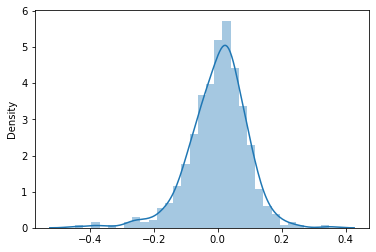

In [292]:
#Calculate Residuals and plotting
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

#### The error graph looks to be normally distributed centered around 0

## Step 7: Making Predictions Using the Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model

In [293]:
# We need add scaling to the test set.add
num_vars = ['cnt','temp','atemp','hum','windspeed']
#transforming
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

<ipython-input-293-ac009b425920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_test[num_vars] = scaler.transform(bike_test[num_vars])
/Users/sbhardwa/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [294]:
#let us look at the transformed set
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
#let us create X_test and y_test
y_test = bike_test.pop('cnt')

In [296]:
X_test = bike_test

In [297]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,...,1,0,0,0,0,0,0,1,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [298]:
#Let us follow the same process and add constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist & Cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,1,0,0,0,0


In [299]:
#let us now drop the variables in the test dataframe which we have dropped while creating the model.
X_test_sm = X_test_sm.drop(['atemp','holiday','mnth_March','mnth_June','mnth_Oct','weekday_Wed','weekday_Thur','mnth_Aug','weekday_Tue','weekday_Sun','mnth_May','weekday_Mon','mnth_Feb','hum','weekday_Sat','workingday'],axis=1)

In [301]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     220 non-null    float64
 1   yr                        220 non-null    int64  
 2   temp                      220 non-null    float64
 3   windspeed                 220 non-null    float64
 4   season_Spring             220 non-null    uint8  
 5   season_Summer             220 non-null    uint8  
 6   season_Winter             220 non-null    uint8  
 7   mnth_Dec                  220 non-null    uint8  
 8   mnth_Jan                  220 non-null    uint8  
 9   mnth_July                 220 non-null    uint8  
 10  mnth_Nov                  220 non-null    uint8  
 11  mnth_Sept                 220 non-null    uint8  
 12  weathersit_Light Snow     220 non-null    uint8  
 13  weathersit_Mist & Cloudy  220 non-null    uint8  
dtypes: float

In [302]:
# Making predictions using the model
y_test_pred = lr_model.predict(X_test_sm)

## Step 8: Evalute the model using R2_sqaure

In [303]:
#importing the relevant library
from sklearn.metrics import r2_score

In [304]:
#let us know calculate the r2 square
r2_score(y_true=y_test,y_pred=y_test_pred)
# we observe that the R2 score for test data is .813 which is similar to the R2 value of the model .835

0.8131863556593932

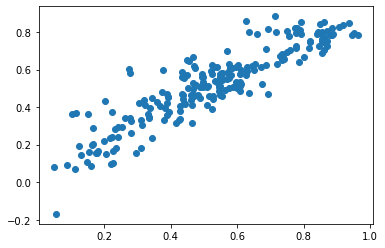

In [310]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.show()
#we can see a good pattern between the predicted values vs actual values.

In [309]:
#here are the values of the constant and variable coefficients.
lr_model.params

const                       0.246055
yr                          0.234850
temp                        0.436175
windspeed                  -0.159746
season_Spring              -0.074901
season_Summer               0.034270
season_Winter               0.086182
mnth_Dec                   -0.043947
mnth_Jan                   -0.051349
mnth_July                  -0.049055
mnth_Nov                   -0.047558
mnth_Sept                   0.064512
weathersit_Light Snow      -0.288561
weathersit_Mist & Cloudy   -0.078636
dtype: float64